检测到 Pickle 文件, 文档数: 274378
文档导入完成
迭代 100, log-likelihood per word: -8.248030
迭代 200, log-likelihood per word: -8.201071
迭代 300, log-likelihood per word: -8.189032
迭代 400, log-likelihood per word: -8.182371
迭代 500, log-likelihood per word: -8.179899
迭代 600, log-likelihood per word: -8.179206
迭代 700, log-likelihood per word: -8.167015
迭代 800, log-likelihood per word: -8.164740
迭代 900, log-likelihood per word: -8.164221
迭代 1000, log-likelihood per word: -8.163914
迭代 1100, log-likelihood per word: -8.163814
迭代 1200, log-likelihood per word: -8.158980
迭代 1300, log-likelihood per word: -8.158525
迭代 1400, log-likelihood per word: -8.158304
迭代 1500, log-likelihood per word: -8.158085
迭代 1600, log-likelihood per word: -8.157669
迭代 1700, log-likelihood per word: -8.151529
迭代 1800, log-likelihood per word: -8.145525
迭代 1900, log-likelihood per word: -8.140210
迭代 2000, log-likelihood per word: -8.136683

发现的主题数: 68
Topic 0: ['股份', '亿元', '资金', '中国', '科技', '买入', '宁德时代', '主力', '卖出', '流出', '净流入', '板块'

C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\2954653732.py:75: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(SAVE_DIR, "hdp_training_curve.png"), dpi=300)
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\2954653732.py:75: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(SAVE_DIR, "hdp_training_curve.png"), dpi=300)
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\2954653732.py:75: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(SAVE_DIR, "hdp_training_curve.png"), dpi=300)
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\2954653732.py:75: UserWarning: Glyph 25947 (\N{CJK UNIFIED IDEOGRAPH-655B}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(SAVE_DIR, "hdp_training_curve.png"), dpi=300)
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\2954653732.py:75: UserW

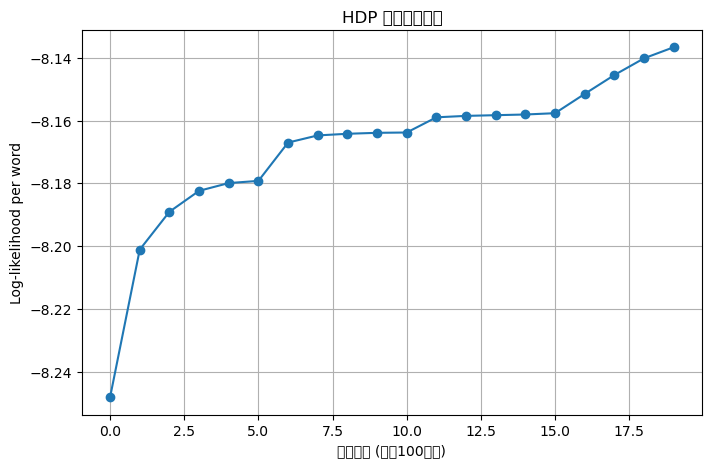

困惑度曲线已保存: data/HDP\hdp_training_curve.png


In [1]:
import os
import pickle
import tomotopy as tp
import matplotlib.pyplot as plt

CORPUS_PATH = "data/paragraph"  
SAVE_DIR = "data/HDP/model"
MODEL_PATH = os.path.join(SAVE_DIR, "hdp_model_final_auto.bin")
os.makedirs(SAVE_DIR, exist_ok=True)

if os.path.exists(CORPUS_PATH + ".pkl"):
    CORPUS_PATH += ".pkl"
    with open(CORPUS_PATH, "rb") as f:
        docs = pickle.load(f)
    print(f"检测到 Pickle 文件, 文档数: {len(docs)}")
elif os.path.exists(CORPUS_PATH + ".txt"):
    CORPUS_PATH += ".txt"
    docs = []
    with open(CORPUS_PATH, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if line:
                docs.append(line.split())
    print(f"检测到文本文件, 文档数: {len(docs)}")
else:
    raise FileNotFoundError("没有找到 corpus_cleaned.txt 或 corpus_cleaned.pkl")

mdl = tp.HDPModel(
    tw=tp.TermWeight.ONE,
    min_cf=5, 
    min_df=5,
)

for doc in docs:
    mdl.add_doc(doc)
print("文档导入完成")

MAX_ITER = 2000        
STEP = 100             
CONV_THRESHOLD = 0.0001 
CONV_PATIENCE = 3     

ll_history = []
converged_count = 0

for i in range(0, MAX_ITER, STEP):
    mdl.train(STEP)
    ll = mdl.ll_per_word
    ll_history.append(ll)
    print(f"迭代 {i+STEP}, log-likelihood per word: {ll:.6f}")

    if len(ll_history) > 1:
        diff = abs(ll_history[-1] - ll_history[-2])
        if diff < CONV_THRESHOLD:
            converged_count += 1
            if converged_count >= CONV_PATIENCE:
                print(f"收敛条件满足，停止训练 (连续{CONV_PATIENCE}次变化 < {CONV_THRESHOLD})")
                break
        else:
            converged_count = 0

print(f"\n发现的主题数: {mdl.live_k}")
for k in range(mdl.live_k):
    print(f"Topic {k}: {[w for w, _ in mdl.get_topic_words(k, top_n=15)]}")

mdl.save(MODEL_PATH)
print(f"模型已保存: {MODEL_PATH}")

plt.figure(figsize=(8,5))
plt.plot(range(len(ll_history)), ll_history, marker="o")
plt.title("HDP 训练收敛曲线")
plt.xlabel("阶段次数 (每步100迭代)")
plt.ylabel("Log-likelihood per word")
plt.grid(True)
plt.savefig(os.path.join(SAVE_DIR, "hdp_training_curve.png"), dpi=300)
plt.show()
print(f"困惑度曲线已保存: {os.path.join(SAVE_DIR, 'hdp_training_curve.png')}")

正在加载模型：data/HDP\hdp_model_final_auto.bin
模型加载成功，当前活跃主题数: 68

开始继续训练 HDP 模型...

继续迭代 50, log-likelihood per word: -8.133687, 当前活跃主题数: 68
继续迭代 100, log-likelihood per word: -8.132647, 当前活跃主题数: 67
继续迭代 150, log-likelihood per word: -8.132330, 当前活跃主题数: 69
继续迭代 200, log-likelihood per word: -8.132213, 当前活跃主题数: 67
继续迭代 250, log-likelihood per word: -8.132151, 当前活跃主题数: 68

连续 3 次相对变化 < 0.0001，训练收敛。

继续训练后的模型已保存：data/HDP\hdp_model_final_auto.bin


C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\3002749600.py:56: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\3002749600.py:56: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\3002749600.py:56: UserWarning: Glyph 38454 (\N{CJK UNIFIED IDEOGRAPH-9636}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\3002749600.py:56: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\3002749600.py:56: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zhao\AppData\Local\Temp\ipykernel_15792\3002749600.py:56: UserWarning: Glyph 27599 (\N{CJK 

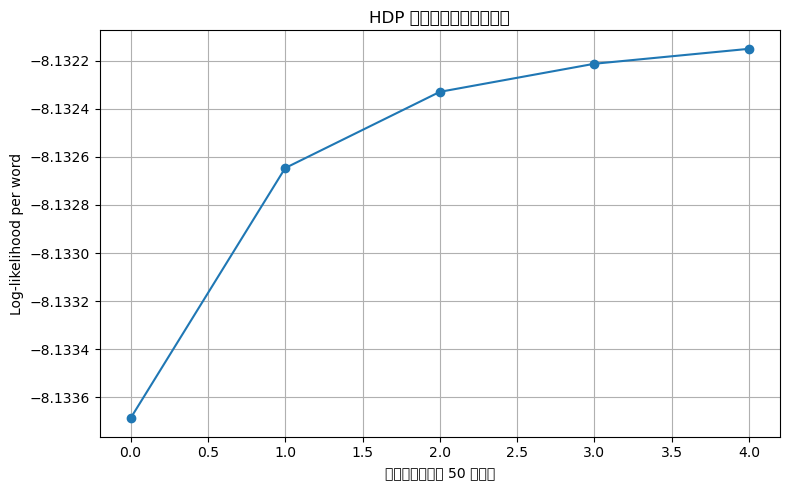

收敛曲线已保存：data/HDP\hdp_training_curve_continued.png


In [5]:
import os
import tomotopy as tp
import matplotlib.pyplot as plt

SAVE_DIR = "data/HDP/model"
MODEL_PATH = os.path.join(SAVE_DIR, "hdp_model_final_auto.bin")
assert os.path.exists(MODEL_PATH), f"模型文件不存在：{MODEL_PATH}"


print(f"正在加载模型：{MODEL_PATH}")
mdl = tp.HDPModel.load(MODEL_PATH)
print(f"模型加载成功，当前活跃主题数: {mdl.live_k}")


STEP = 50               
EXTRA_ITER = 3500       
CONV_THRESHOLD = 1e-4   
CONV_PATIENCE = 3       #
NUM_WORKERS = os.cpu_count() - 2


ll_history = []
prev_ll = None
converged_rounds = 0

print("\n开始继续训练 HDP 模型...\n")
for i in range(0, EXTRA_ITER, STEP):
    mdl.train(STEP, workers=NUM_WORKERS)
    ll = mdl.ll_per_word
    ll_history.append(ll)

    print(f"继续迭代 {i+STEP}, log-likelihood per word: {ll:.6f}, 当前活跃主题数: {mdl.live_k}")

    if prev_ll is not None:
        rel_diff = abs(ll - prev_ll) / abs(prev_ll)
        if rel_diff < CONV_THRESHOLD:
            converged_rounds += 1
            if converged_rounds >= CONV_PATIENCE:
                print(f"\n连续 {CONV_PATIENCE} 次相对变化 < {CONV_THRESHOLD}，训练收敛。")
                break
        else:
            converged_rounds = 0
    prev_ll = ll


mdl.save(MODEL_PATH)
print(f"\n继续训练后的模型已保存：{MODEL_PATH}")


plt.figure(figsize=(8,5))
plt.plot(range(len(ll_history)), ll_history, marker="o")
plt.title("HDP 模型继续训练收敛曲线")
plt.xlabel(f"训练阶段（每步 {STEP} 迭代）")
plt.ylabel("Log-likelihood per word")
plt.grid(True)
plt.tight_layout()
curve_path = os.path.join(SAVE_DIR, "hdp_training_curve_continued.png")
plt.savefig(curve_path, dpi=300)
plt.show()
print(f"收敛曲线已保存：{curve_path}")


In [9]:
import os
import pickle
import pandas as pd
import tomotopy as tp
from gensim.models import KeyedVectors
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from octis.evaluation_metrics.diversity_metrics import TopicDiversity

HDP_MODEL_PATH = "data/HDP/model\hdp_model_final_auto.bin"

PROCESSED_CORPUS_PICKLE = 'data/paragraph.pkl'

TENCENT_WV_PATH = 'data/origin/tencent-ailab-embedding-zh-d100-v0.2.0-s.txt'

RESULTS_CSV_PATH = 'data/HDP/hdp_evaluation_results.csv'


TOP_K_COHERENCE = 20 
TOP_K_DIVERSITY = 10 

def main():
    print("--- Tomotopy HDP 模型评估脚本 ---")

    print("\n--- 1. 正在加载评估所需的文件... ---")
    
    if not os.path.exists(PROCESSED_CORPUS_PICKLE):
        raise FileNotFoundError(f"错误: 找不到原始语料文件: {PROCESSED_CORPUS_PICKLE}")
    with open(PROCESSED_CORPUS_PICKLE, 'rb') as f:
        processed_texts = pickle.load(f)
    print(f" - 成功加载 {len(processed_texts)} 条原始文本。")

    print(" - 正在根据原始文本创建Gensim词典...")
    dictionary = Dictionary(processed_texts)
    print(f" - 成功创建Gensim词典 (大小: {len(dictionary)})。")

    print(" - 正在加载腾讯词向量模型...")
    word_vectors = KeyedVectors.load_word2vec_format(TENCENT_WV_PATH, binary=False)
    print(" - 成功加载腾讯词向量。")

    print("\n--- 2. 正在加载Tomotopy HDP模型... ---")
    if not os.path.exists(HDP_MODEL_PATH):
        raise FileNotFoundError(f"错误: 找不到HDP模型文件: {HDP_MODEL_PATH}")
    
    hdp_model = tp.HDPModel.load(HDP_MODEL_PATH)
    live_topics_count = hdp_model.live_k
    print(f" - HDP模型加载成功，发现 {live_topics_count} 个有效主题。")

    print(f" - 正在提取主题词 (Coherence topk={TOP_K_COHERENCE}, Diversity topk={TOP_K_DIVERSITY})...")
    topics_for_coherence = [
        [word for word, _ in hdp_model.get_topic_words(k, top_n=TOP_K_COHERENCE)] 
        for k in range(live_topics_count)
    ]
    topics_for_diversity = [
        [word for word, _ in hdp_model.get_topic_words(k, top_n=TOP_K_DIVERSITY)] 
        for k in range(live_topics_count)
    ]

    print("\n--- 3. 开始计算评估指标... ---")

    coherence_model = CoherenceModel(
        topics=topics_for_coherence,
        texts=processed_texts,
        dictionary=dictionary,
        coherence='c_w2v',
        keyed_vectors=word_vectors
    )
    cw2v_score = coherence_model.get_coherence()
    print(f" - C_W2V (Semantic, topk={TOP_K_COHERENCE}): {cw2v_score:.4f}")

    diversity_metric = TopicDiversity(topk=TOP_K_DIVERSITY)
    model_output_for_diversity = {"topics": topics_for_diversity}
    diversity_score = diversity_metric.score(model_output_for_diversity)
    print(f" - Topic Diversity (topk={TOP_K_DIVERSITY}): {diversity_score:.4f}")
    
    results_df = pd.DataFrame([{
        "Model": "HDP-tomo",
        "Num_Topics_Found": live_topics_count,
        "Coherence(C_w2v)": cw2v_score,
        "Topic Diversity": diversity_score
    }])
    
    print("\n--- 评估完成, 最终结果如下: ---")
    print(results_df)

    os.makedirs(os.path.dirname(RESULTS_CSV_PATH), exist_ok=True)
    results_df.to_csv(RESULTS_CSV_PATH, index=False)
    print(f"\n评估结果已保存到 {RESULTS_CSV_PATH}")

if __name__ == "__main__":
    main()

--- Tomotopy HDP 模型评估脚本 ---

--- 1. 正在加载评估所需的文件... ---
 - 成功加载 274378 条原始文本。
 - 正在根据原始文本创建Gensim词典...
 - 成功创建Gensim词典 (大小: 329810)。
 - 正在加载腾讯词向量模型...
 - 成功加载腾讯词向量。

--- 2. 正在加载Tomotopy HDP模型... ---
 - HDP模型加载成功，发现 68 个有效主题。
 - 正在提取主题词 (Coherence topk=20, Diversity topk=10)...

--- 3. 开始计算评估指标... ---
 - C_W2V (Semantic, topk=20): 0.6370
 - Topic Diversity (topk=10): 0.6632

--- 评估完成, 最终结果如下: ---
      Model  Num_Topics_Found  Coherence(C_w2v)  Topic Diversity
0  HDP-tomo                68          0.637021         0.663235

评估结果已保存到 data/HDP/hdp_evaluation_results.csv
